In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

GPU is available and being used.
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from IPython.display import Image
import os, datetime

In [5]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/luflow.csv'


Mounted at /content/drive


In [7]:
file_path_1 = '/content/drive/MyDrive/VIT/Dataset/CIC-DDoS2019/cic-ddos2019-parquet-preprocessed.csv'

In [8]:
# Step 1: Load the dataset from Google Drive
df1 = pd.read_csv(file_path_1)

column_names = df1.columns
print("Column Names df1 / Features:")
print(column_names)

Column Names df1 / Features:
Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
    

In [9]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['Label'].value_counts())
    print("\n\n\n")

In [10]:
%%time
dataProperties(df1, "DF1")

DF1
Number of rows (Samples):  203508
Number of columns (Features):  78
Label
Benign           97831
TFTP             19783
UDP              18090
DrDoS_NTP        12137
DrDoS_UDP        10420
Syn               9875
UDP-lag           8872
MSSQL             8523
DrDoS_MSSQL       6212
DrDoS_DNS         3669
DrDoS_SNMP        2717
LDAP              1906
DrDoS_LDAP        1440
Portmap            685
NetBIOS            644
DrDoS_NetBIOS      598
UDPLag              55
WebDDoS             51
Name: count, dtype: int64




CPU times: user 15.3 ms, sys: 0 ns, total: 15.3 ms
Wall time: 18.8 ms


**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [11]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

In [12]:
%%time
network_data_d1 = dropInfNull(df1)

(203508, 78)
(203508, 78)
CPU times: user 176 ms, sys: 81.8 ms, total: 258 ms
Wall time: 257 ms


In [13]:
#Get the unique labels
unique_labels = network_data_d1['Label'].unique()

#Get the counts of each unique label
label_counts = network_data_d1['Label'].value_counts()

#Print the results

print("Unique Labels:")
print(unique_labels)

print("\nCounts of Each Label:")
print(label_counts)

Unique Labels:
['DrDoS_NTP' 'TFTP' 'Syn' 'MSSQL' 'LDAP' 'Benign' 'NetBIOS' 'UDP'
 'Portmap' 'UDPLag' 'DrDoS_DNS' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_SNMP'
 'UDP-lag' 'WebDDoS' 'DrDoS_NetBIOS' 'DrDoS_UDP']

Counts of Each Label:
Label
Benign           97831
TFTP             19783
UDP              18090
DrDoS_NTP        12137
DrDoS_UDP        10420
Syn               9875
UDP-lag           8872
MSSQL             8523
DrDoS_MSSQL       6212
DrDoS_DNS         3669
DrDoS_SNMP        2717
LDAP              1906
DrDoS_LDAP        1440
Portmap            685
NetBIOS            644
DrDoS_NetBIOS      598
UDPLag              55
WebDDoS             51
Name: count, dtype: int64


In [14]:
df_balanced = network_data_d1

**Understanding the Data Type of the Dataset**

In [15]:
# Access the dtypes attribute
feature_data_types = df_balanced.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
Protocol                      int64
Flow Duration                 int64
Total Fwd Packets             int64
Total Backward Packets        int64
Fwd Packets Length Total    float64
                             ...   
Idle Mean                   float64
Idle Std                    float64
Idle Max                    float64
Idle Min                    float64
Label                        object
Length: 78, dtype: object


In [16]:
df_balanced['Label'] = df_balanced['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

**Drop Constant Column**

In [17]:
%%time
# drop the constant columns (which varience is 0)
variances = df_balanced.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = df_balanced.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
       'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')
(203508, 66)
CPU times: user 61.4 ms, sys: 22.7 ms, total: 84 ms
Wall time: 88.2 ms


**Drop Duplicate Column**

In [18]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

{'RST Flag Count', 'Avg Bwd Segment Size', 'Subflow Bwd Packets', 'Subflow Fwd Packets', 'Avg Fwd Segment Size'}
(203508, 61)


**Drop Columns based on correlation**

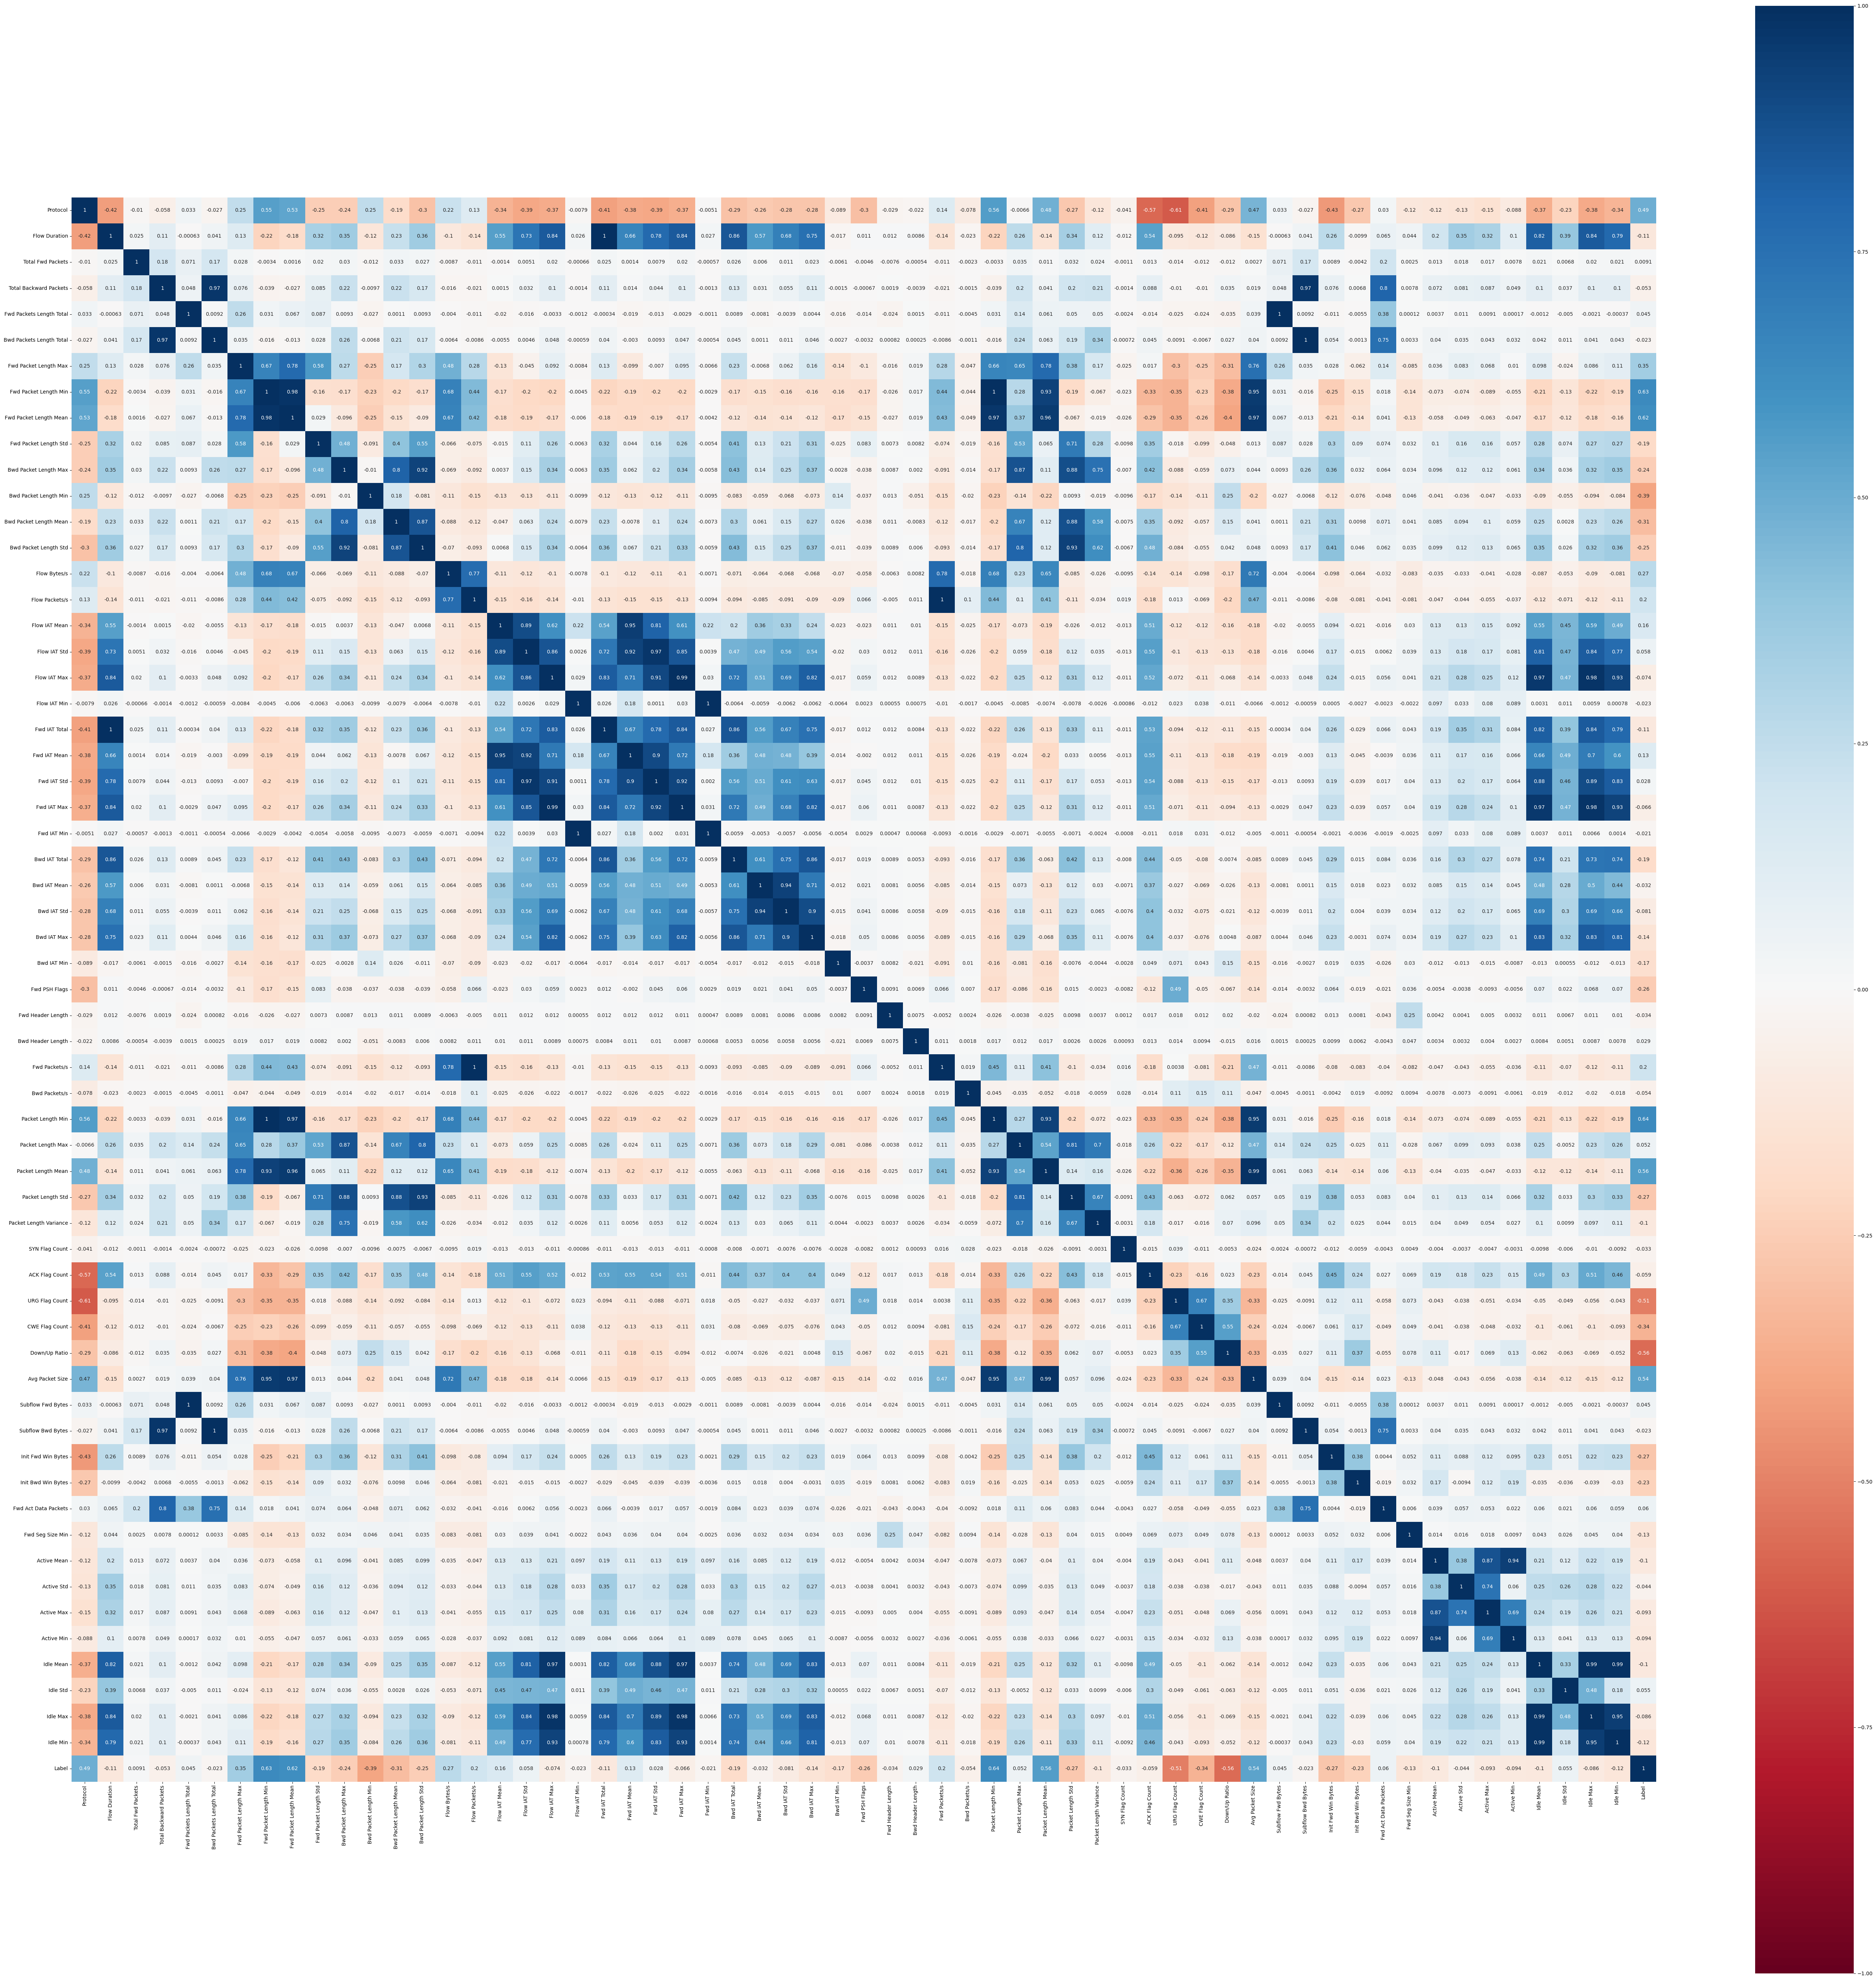

CPU times: user 8.15 s, sys: 359 ms, total: 8.51 s
Wall time: 8.46 s


In [19]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [20]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Fwd IAT Max', 'Active Mean', 'Packet Length Mean', 'Flow IAT Mean', 'Flow Packets/s', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Packet Length Min', 'Bwd Packets Length Total', 'Idle Mean', 'Fwd IAT Mean', 'Fwd Packets Length Total', 'Idle Max', 'Total Backward Packets', 'Bwd Packet Length Max', 'Bwd IAT Mean', 'Fwd Packet Length Min', 'Fwd IAT Std', 'Flow IAT Min', 'Flow IAT Std', 'Flow Duration', 'Flow IAT Max'}
22
CPU times: user 31.7 ms, sys: 0 ns, total: 31.7 ms
Wall time: 31.4 ms


In [21]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(203508, 39)
CPU times: user 7.5 ms, sys: 15.4 ms, total: 22.9 ms
Wall time: 22.7 ms


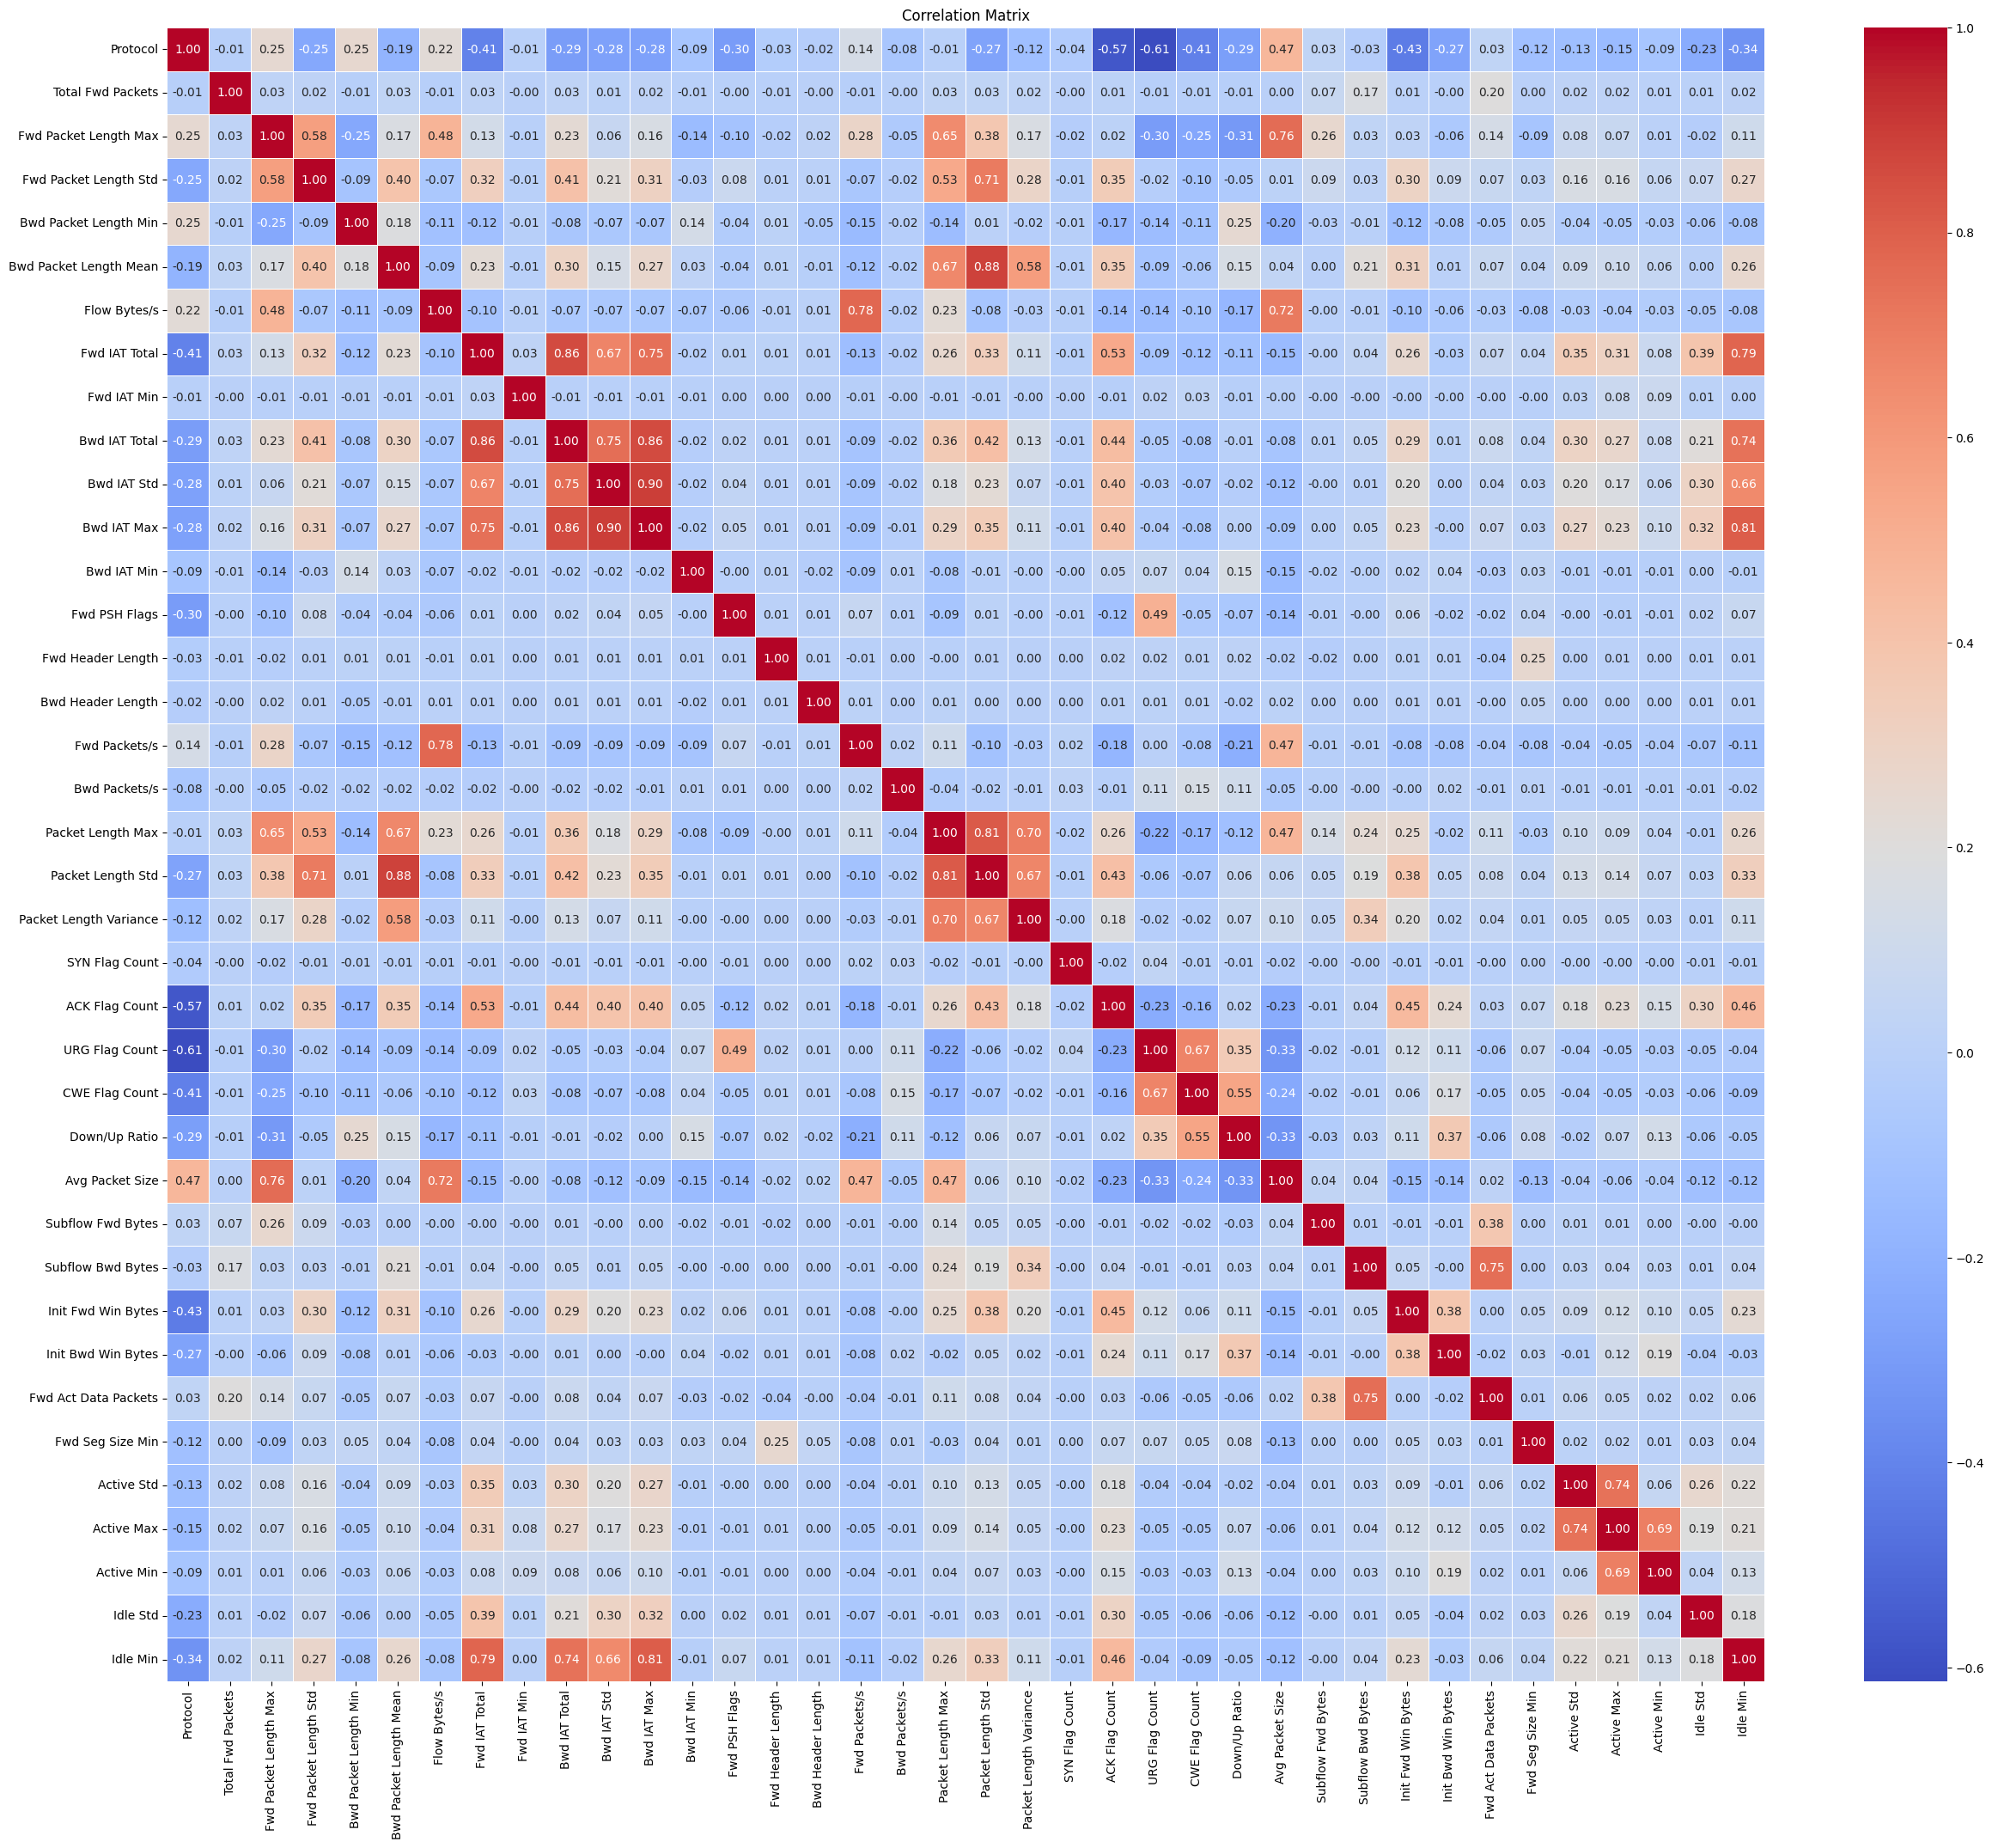

In [23]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop('Label', axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

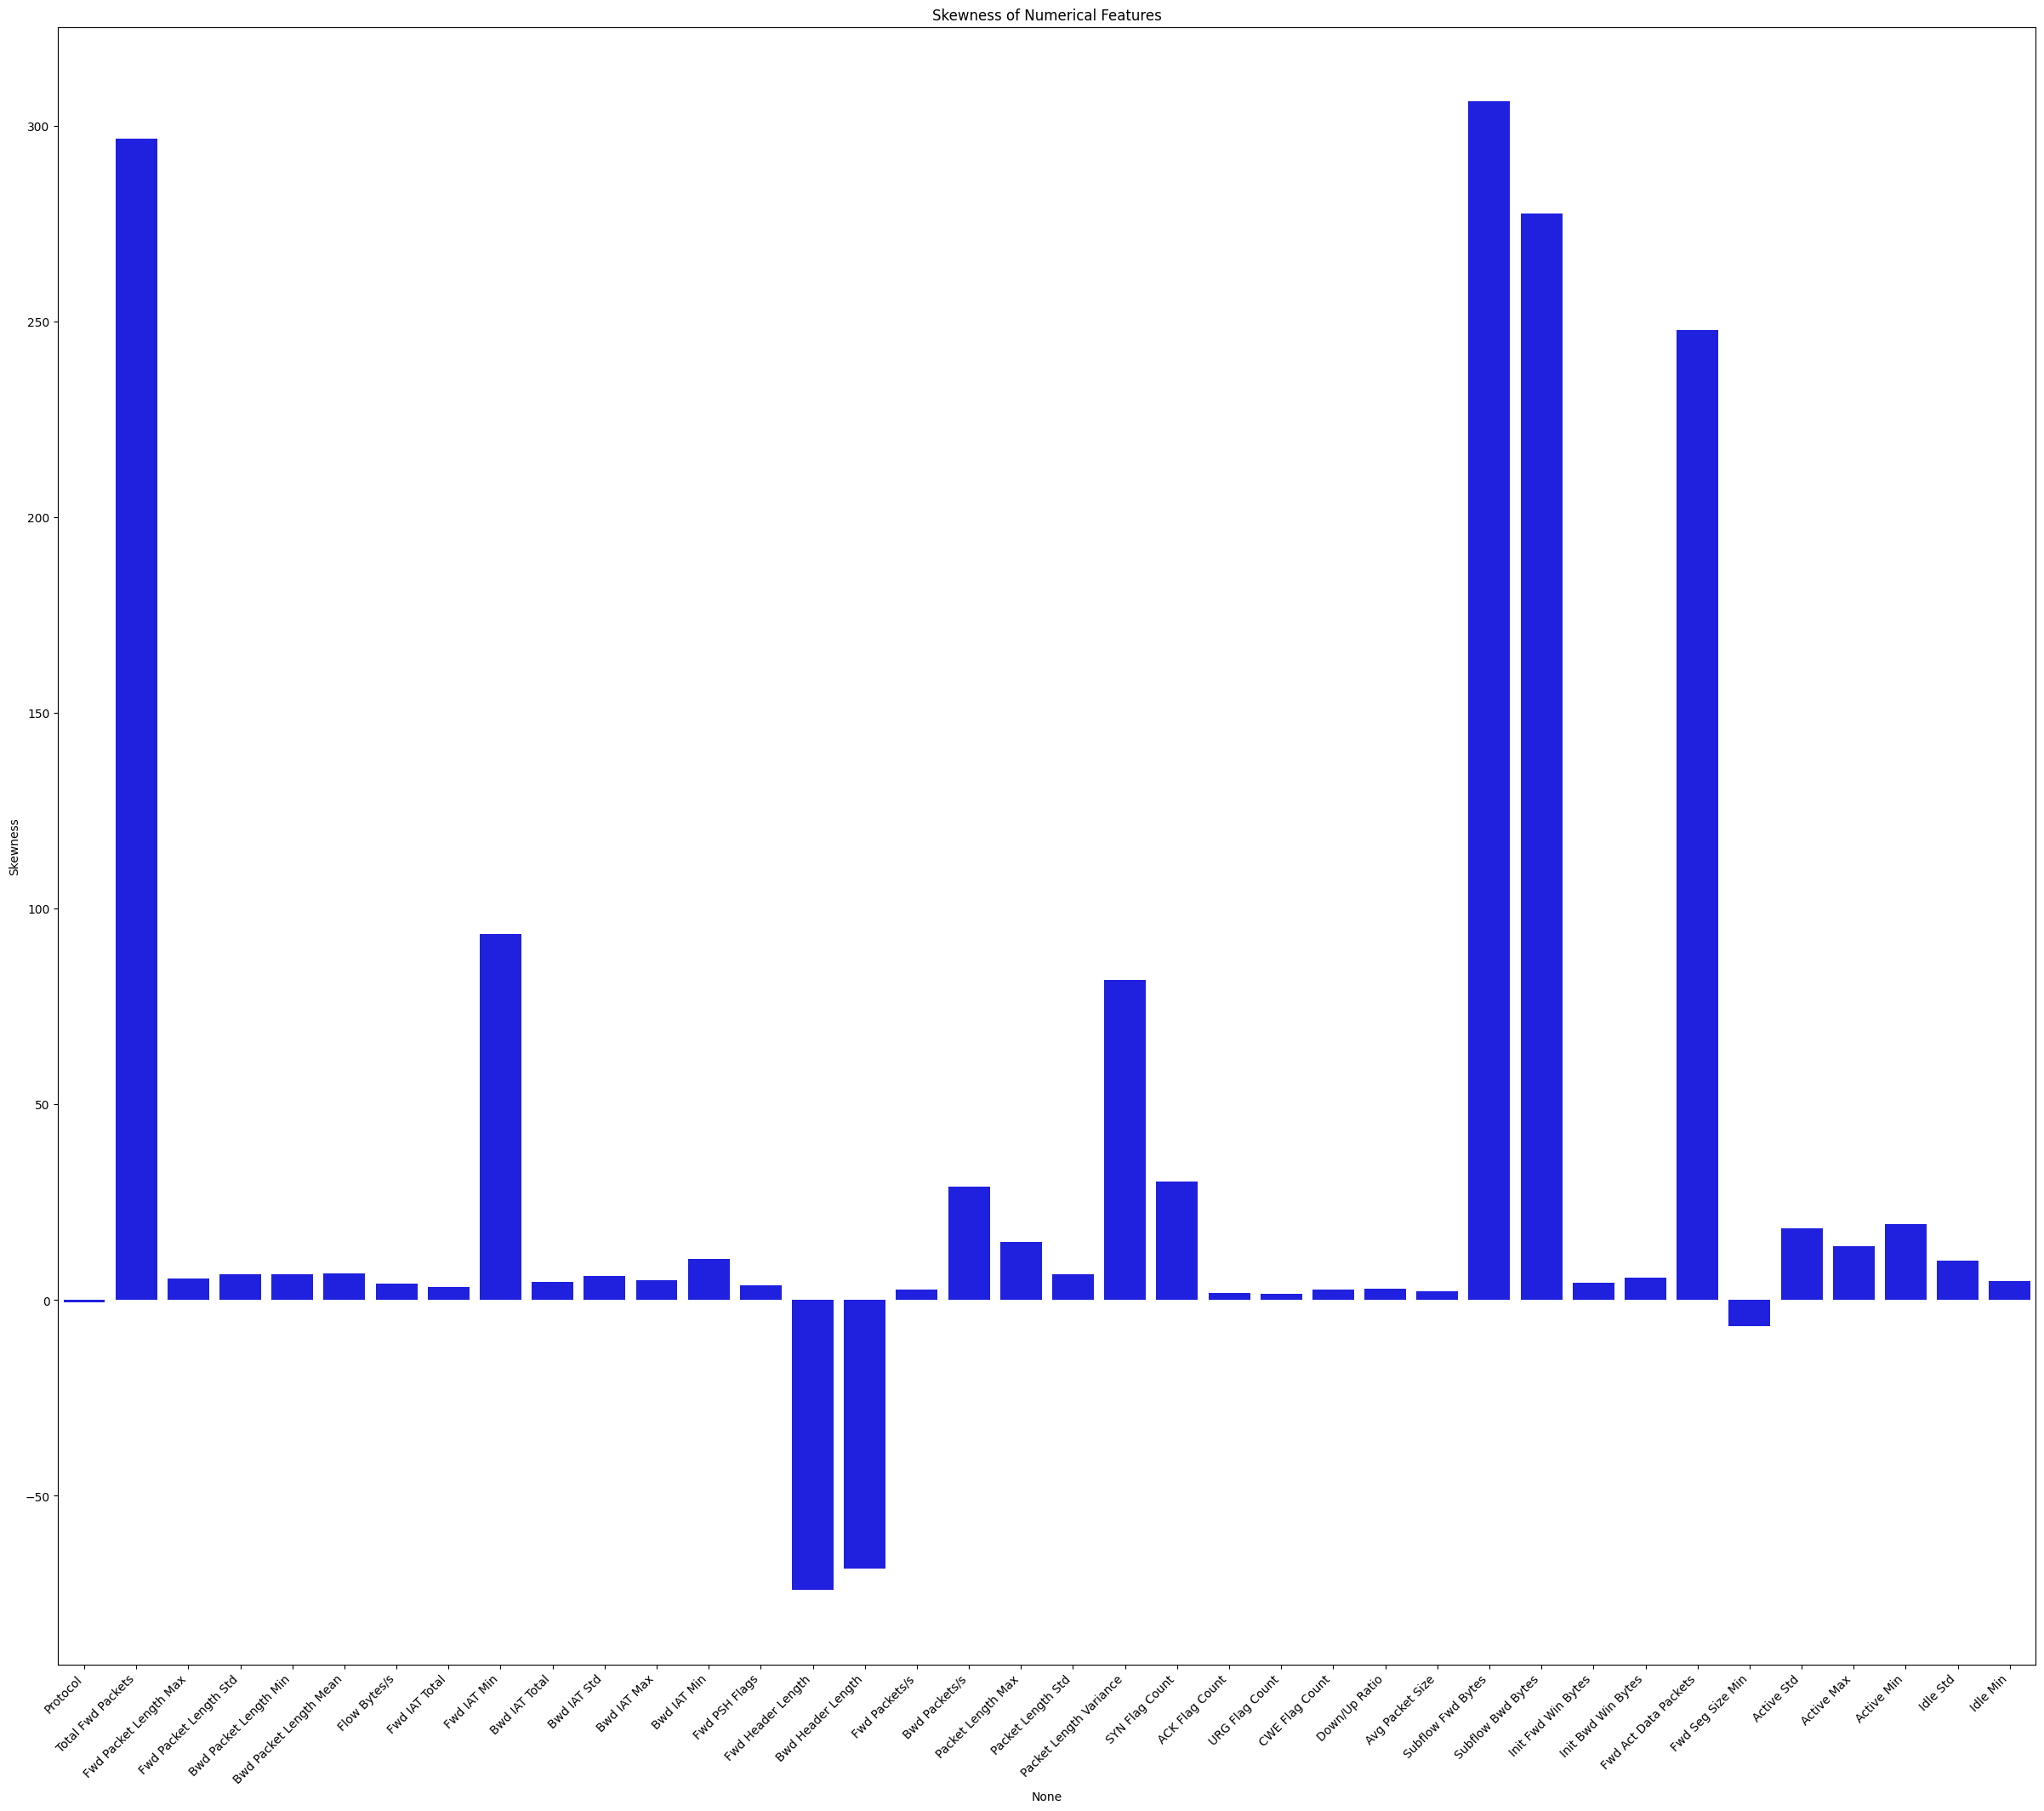

In [24]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop('Label', axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(30, 25))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [25]:
%%time
X=df_balanced.drop(["Label"], axis=1)
y=df_balanced["Label"]

CPU times: user 9.89 ms, sys: 8.17 ms, total: 18.1 ms
Wall time: 17.1 ms


In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_scaled = scaler.fit_transform(X)

In [27]:
# Reshape data for LSTM
# LSTMs expect input in the format (samples, time steps, features)

# This is a critical step and depends on how you want to define your sequences.
# For example, you could group flows into sequences based on time windows, source IP,
# destination IP, or other criteria.
# For simplicity here, let's assume each row is a single time step in a sequence of length 1.
# This is not the typical use of LSTMs, but it demonstrates the reshaping.
# A more realistic approach would involve creating meaningful sequences of network events.

# Example: Reshaping for a single time step per sample
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data (using the reshaped data)
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42, shuffle=True)

In [28]:
# --- Build the LSTM Model ---

# Define the model
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])), # LSTM layer
    Dropout(0.3),
    LSTM(32), # Another LSTM layer, return_sequences=False for the last LSTM layer
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[tf.keras.metrics.AUC(name='auc')])

# Print model summary
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,817 (151.63 KB)

 Trainable params: 38,817 (151.63 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# --- Train the LSTM Model ---

# Calculate balance_weight if needed (similar to your MLP)
benign_count = y_train.value_counts()[0]
anomaly_count = y_train.value_counts()[1]
balance_weight = benign_count / anomaly_count if anomaly_count > 0 else 1.0
class_weights = {0: 1, 1: balance_weight}

print(f"Balance Weight: {balance_weight}")

Balance Weight: 0.9252400548696845


In [31]:
history_lstm = model_lstm.fit(x_train, y_train,
                              epochs=50, # Adjust epochs
                              batch_size=256, # Adjust batch size
                              validation_split=0.2,
                              class_weight=class_weights,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])


Epoch 1/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - auc: 0.9719 - loss: 0.2595 - val_auc: 0.9990 - val_loss: 0.0171
Epoch 2/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9990 - loss: 0.0166 - val_auc: 0.9995 - val_loss: 0.0141
Epoch 3/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9992 - loss: 0.0156 - val_auc: 0.9997 - val_loss: 0.0128
Epoch 4/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9994 - loss: 0.0120 - val_auc: 0.9997 - val_loss: 0.0121
Epoch 5/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9995 - loss: 0.0129 - val_auc: 0.9997 - val_loss: 0.0119
Epoch 6/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9995 - loss: 0.0116 - val_auc: 0.9998 - val_loss: 0.0113
Epoch 7/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9994 - loss: 0.0116 - val_auc: 0.9998 - val_loss: 0.0109
Epoch 8/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - auc: 0.9996 - loss: 0.0106 - val_auc: 0.9995 - val_loss: 0.0110
Epoch 9/50
509/509 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - au

In [32]:
# --- Evaluate the LSTM Model ---

loss_lstm, auc_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
print(f"--- LSTM Classifier ---")
print(f"Test AUC: {auc_lstm:.4f}")

--- LSTM Classifier ---
Test AUC: 0.9995


In [33]:
# Get predictions and probabilities
y_pred_proba_lstm = model_lstm.predict(x_test).ravel()
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_lstm))

1272/1272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19589
           1       1.00      1.00      1.00     21113

    accuracy                           1.00     40702
   macro avg       1.00      1.00      1.00     40702
weighted avg       1.00      1.00      1.00     40702



In [34]:
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_lstm))

ROC AUC Score:
0.999860175437718


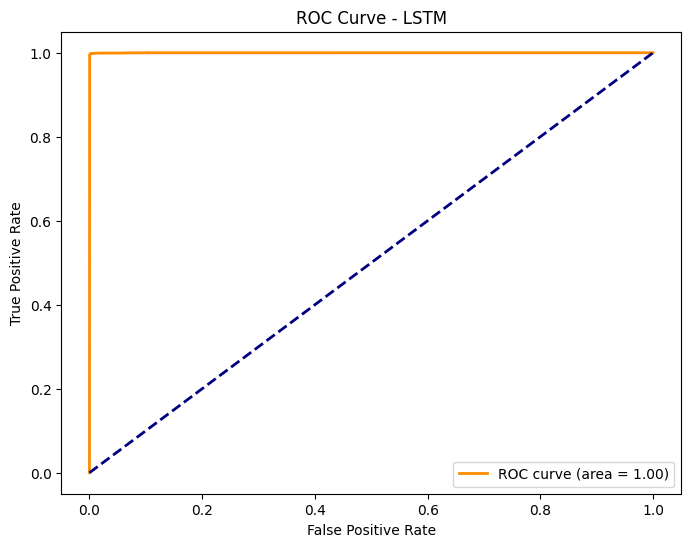

In [35]:
# Plot ROC curve
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend(loc="lower right")
plt.show()

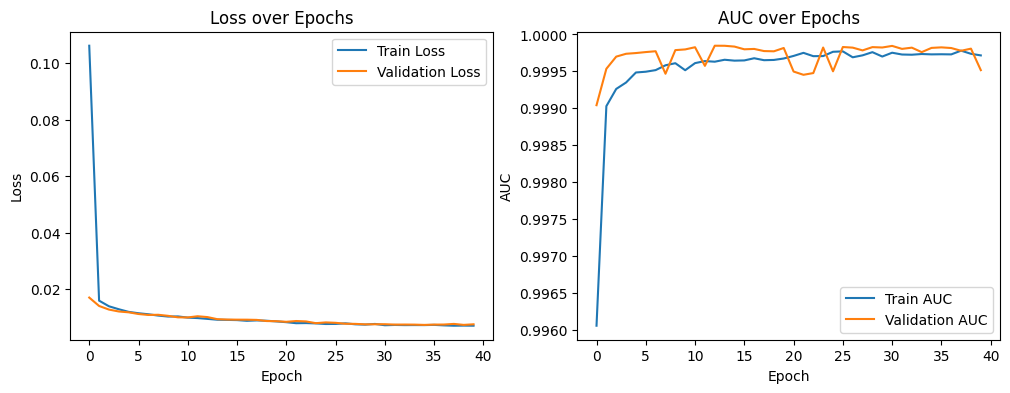

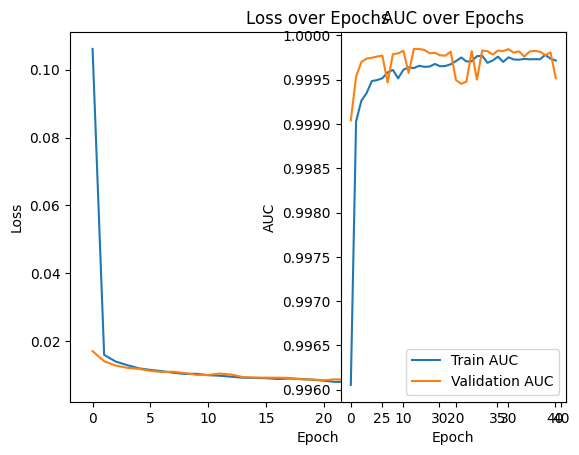

In [36]:
# Plot training history (optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['auc'], label='Train AUC')
plt.plot(history_lstm.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['auc'], label='Train AUC')
plt.plot(history_lstm.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [37]:
# Calculate the confusion matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Print the confusion matrix
print("Confusion Matrix for LSTM:")
print(conf_matrix_lstm)

Confusion Matrix for LSTM:
[[19564    25]
 [   57 21056]]


In [38]:
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_lstm.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


Confusion Matrix Components:
True Negatives (TN): 19564
False Positives (FP): 25
False Negatives (FN): 57
True Positives (TP): 21056


Feature Importance

In [46]:
!pip install shap

The feature importance code is very compute expensive and time consuming. With GPU L4 ON, the below code ran for more than 120 min. It could not get the result also

In [ ]:
# Split the scaled data (before reshaping)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Reshape the training and testing data for LSTM
# LSTMs expect input in the format (samples, time steps, features)
x_train = X_scaled_train.reshape((X_scaled_train.shape[0], 1, X_scaled_train.shape[1]))
x_test = X_scaled_test.reshape((X_scaled_test.shape[0], 1, X_scaled_test.shape[1]))

# --- Build the LSTM Model ---

# Define the model
model_lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])), # LSTM layer
    Dropout(0.3),
    LSTM(32), # Another LSTM layer, return_sequences=False for the last LSTM layer
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=[tf.keras.metrics.AUC(name='auc')])

# Print model summary
model_lstm.summary()

# --- Train the LSTM Model ---

# Calculate balance_weight if needed (similar to your MLP)
benign_count = y_train.value_counts()[0]
anomaly_count = y_train.value_counts()[1]
balance_weight = benign_count / anomaly_count if anomaly_count > 0 else 1.0
class_weights = {0: 1, 1: balance_weight}

print(f"Balance Weight: {balance_weight}")

history_lstm = model_lstm.fit(x_train, y_train,
                              epochs=50, # Adjust epochs
                              batch_size=256, # Adjust batch size
                              validation_split=0.2,
                              class_weight=class_weights,
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

# %%
# --- Evaluate the LSTM Model ---

loss_lstm, auc_lstm = model_lstm.evaluate(x_test, y_test, verbose=0)
print(f"--- LSTM Classifier ---")
print(f"Test AUC: {auc_lstm:.4f}")

# %%
# Get predictions and probabilities
y_pred_proba_lstm = model_lstm.predict(x_test).ravel()
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_lstm))

# %%
print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba_lstm))

# %%
# Plot ROC curve
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend(loc="lower right")
plt.show()

# %%
# Plot training history (optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['auc'], label='Train AUC')
plt.plot(history_lstm.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['auc'], label='Train AUC')
plt.plot(history_lstm.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()
# %%
# Calculate the confusion matrix
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)

# Print the confusion matrix
print("Confusion Matrix for LSTM:")
print(conf_matrix_lstm)
# %%
# Extract TN, FP, FN, TP from the confusion matrix
# The confusion matrix structure for binary classification in sklearn is:
# [[TN, FP],
#  [FN, TP]]
tn, fp, fn, tp = conf_matrix_lstm.ravel()

# Print the values
print("\nConfusion Matrix Components:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# %% [markdown]
# Feature Importance
# %%
!pip install shap
# %%
import shap

# SHAP requires an "explainer" which is model-specific.
# For deep learning models like LSTMs, KernelExplainer or DeepExplainer can be used.
# DeepExplainer is typically faster for deep networks but requires specific conditions.
# KernelExplainer is model-agnostic but can be slower.

# Let's try KernelExplainer first as it's more general.
# KernelExplainer requires a background dataset (e.g., a small sample of your training data).
# You'll also need a prediction function that takes the data in its original format
# (before reshaping for LSTM) and returns the model's output.

# Create a background dataset (e.g., a sample of the scaled training data)
# You need the scaled training data before reshaping for LSTM.
# Let's assume you have X_scaled_train.
# If not, split X_scaled initially into X_scaled_train and X_scaled_test.

# Assuming X_scaled_train is available:
background_data = shap.sample(X_scaled_train, 100) # Use a small sample for speed

# Define a prediction function that takes the data in its original format (before reshaping)
# and reshapes it for the model prediction
def predict_proba_reshape(X_input):
    X_reshaped_input = X_input.reshape((-1, 1, X_input.shape[1]))
    return model_lstm.predict(X_reshaped_input)


# Create the explainer
# This can take some time
explainer = shap.KernelExplainer(predict_proba_reshape, background_data)

# Calculate SHAP values for the test set
# This can also take a significant amount of time depending on the size of your test set
shap_values = explainer.shap_values(X_scaled_test)

# Plot global feature importance (Mean absolute SHAP value)
# For binary classification, shap_values is a list with an array for each class.
# We typically plot the shap_values for the positive class (index 1).
# If you want to plot for both classes, you can adjust this.
shap.summary_plot(shap_values[1], features=X_scaled_test, feature_names=X.columns.tolist())